# Install required packages

In [2]:
%pip install -U pretty_midi huggingface_hub datasets note_seq
%pip install --upgrade pyfluidsynth
# !sudo apt install -y fluidsynth

  Using cached pyarrow_hotfix-0.6-py3-none-any.whl.metadata (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached librosa-0.10.1-py3-none-any.whl.metadata (8.3 kB)
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 3.1 MB/s eta 0:00:00
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached lazy_loader-0.3-py3-none-any.whl.metadata (4.3 kB)
   ---------------------------------------- 0.0/510.5 kB ? eta -:--:--
   ----------------- ---------------------- 225.3/510.5 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 510.5/510.5 kB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/209.4 kB ? eta -:--:--
   --------------------------------------- 209.4/209.4 kB 12.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ----- --------------------

# Import required packages

In [2]:
from datasets import load_dataset, Dataset
from huggingface_hub import notebook_login
import note_seq

import glob
import os
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pretty_midi
import fluidsynth

import collections
from typing import Optional
from IPython import display
%matplotlib inline

notebook_login()

# EDA Techniques on the songs

## Load the actual dataset

In [3]:
dataset_name = "english"
files = list(Path(f"/content/drive/MyDrive/MusicGPT/dataset/{dataset_name}").glob("**/*.mid")) \
+ list(Path(f"/content/drive/MyDrive/MusicGPT/dataset/{dataset_name}").glob("**/*.midi"))
print("Total number of songs found:", len(files))
files

Total number of songs found: 330


[PosixPath('/content/drive/MyDrive/MusicGPT/dataset/english/Bach/2213_fugue2.mid'),
 PosixPath('/content/drive/MyDrive/MusicGPT/dataset/english/Bach/2215_fugue1.mid'),
 PosixPath('/content/drive/MyDrive/MusicGPT/dataset/english/Bach/2198_fugue22.mid'),
 PosixPath('/content/drive/MyDrive/MusicGPT/dataset/english/Bach/2211_fugue12.mid'),
 PosixPath('/content/drive/MyDrive/MusicGPT/dataset/english/Bach/2234_prelude11.mid'),
 PosixPath('/content/drive/MyDrive/MusicGPT/dataset/english/Bach/2228_prelude6.mid'),
 PosixPath('/content/drive/MyDrive/MusicGPT/dataset/english/Bach/2191_vs6_5.mid'),
 PosixPath('/content/drive/MyDrive/MusicGPT/dataset/english/Bach/2221_cs3-5bou.mid'),
 PosixPath('/content/drive/MyDrive/MusicGPT/dataset/english/Bach/2232_prelude21.mid'),
 PosixPath('/content/drive/MyDrive/MusicGPT/dataset/english/Bach/2219_cs3-3cou.mid'),
 PosixPath('/content/drive/MyDrive/MusicGPT/dataset/english/Bach/2196_prelude3.mid'),
 PosixPath('/content/drive/MyDrive/MusicGPT/dataset/english/B

In [4]:
len(files)

330

## Load the tokenized dataset

In [5]:
tokenized_data = glob.glob(f'/content/drive/MyDrive/MusicGPT/dataset/{dataset_name}-chunked-tokens/{dataset_name}-tokens/*.txt')
print(f"Total number of tokenized files found: {len(list(tokenized_data))}")
tokenized_data

Total number of tokenized files found: 17


['/content/drive/MyDrive/MusicGPT/dataset/english-chunked-tokens/english-tokens/token_sequences_train_1.txt',
 '/content/drive/MyDrive/MusicGPT/dataset/english-chunked-tokens/english-tokens/token_sequences_valid_1.txt',
 '/content/drive/MyDrive/MusicGPT/dataset/english-chunked-tokens/english-tokens/last_iteration.txt',
 '/content/drive/MyDrive/MusicGPT/dataset/english-chunked-tokens/english-tokens/token_sequences_train_2_1.txt',
 '/content/drive/MyDrive/MusicGPT/dataset/english-chunked-tokens/english-tokens/token_sequences_train_1_1.txt',
 '/content/drive/MyDrive/MusicGPT/dataset/english-chunked-tokens/english-tokens/token_sequences_train_3_1.txt',
 '/content/drive/MyDrive/MusicGPT/dataset/english-chunked-tokens/english-tokens/token_sequences_train_4_1.txt',
 '/content/drive/MyDrive/MusicGPT/dataset/english-chunked-tokens/english-tokens/token_sequences_train_5_1.txt',
 '/content/drive/MyDrive/MusicGPT/dataset/english-chunked-tokens/english-tokens/token_sequences_valid_2_1.txt',
 '/cont

### Remove the redundant files from the tokenized files

In [6]:
redundant = f'/content/drive/MyDrive/MusicGPT/dataset/{dataset_name}-chunked-tokens/{dataset_name}-tokens/last_iteration.txt'
if redundant in tokenized_data:
    tokenized_data.remove(redundant)

print(f"Total number of tokenized files found: {len(list(tokenized_data))}")
tokenized_data

Total number of tokenized files found: 16


['/content/drive/MyDrive/MusicGPT/dataset/english-chunked-tokens/english-tokens/token_sequences_train_1.txt',
 '/content/drive/MyDrive/MusicGPT/dataset/english-chunked-tokens/english-tokens/token_sequences_valid_1.txt',
 '/content/drive/MyDrive/MusicGPT/dataset/english-chunked-tokens/english-tokens/token_sequences_train_2_1.txt',
 '/content/drive/MyDrive/MusicGPT/dataset/english-chunked-tokens/english-tokens/token_sequences_train_1_1.txt',
 '/content/drive/MyDrive/MusicGPT/dataset/english-chunked-tokens/english-tokens/token_sequences_train_3_1.txt',
 '/content/drive/MyDrive/MusicGPT/dataset/english-chunked-tokens/english-tokens/token_sequences_train_4_1.txt',
 '/content/drive/MyDrive/MusicGPT/dataset/english-chunked-tokens/english-tokens/token_sequences_train_5_1.txt',
 '/content/drive/MyDrive/MusicGPT/dataset/english-chunked-tokens/english-tokens/token_sequences_valid_2_1.txt',
 '/content/drive/MyDrive/MusicGPT/dataset/english-chunked-tokens/english-tokens/token_sequences_valid_1_1.tx

### Load the tokenized dataset files and convert into DataFrame

In [7]:
dataset = load_dataset('text', data_files=tokenized_data)
dataset

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 4455
    })
})

In [8]:
data = dataset['train']
data.set_format(type='pandas')
data = data.to_pandas()
data.head()

,text
0,PIECE_START TIME_SIGNATURE=4_4 GENRE=OTHER TRA...
1,PIECE_START TIME_SIGNATURE=4_4 GENRE=OTHER TRA...
2,PIECE_START TIME_SIGNATURE=4_4 GENRE=OTHER TRA...
3,PIECE_START TIME_SIGNATURE=4_4 GENRE=OTHER TRA...
4,PIECE_START TIME_SIGNATURE=4_4 GENRE=OTHER TRA...


### Load the artist and songs

In [9]:
def load_artist_songs(name: str):
    # Create a list of {song_name: file_path} pairs
    song_dict = {str(song).split('/')[-1]: song for song in files if name in str(song)}
    songs_by_artist = []
    for song_name, song_path in song_dict.items():
      songs_by_artist.append(song_name)

    return songs_by_artist

In [10]:
load_artist_songs('Beethoven')

['2315_qt15_3.mid',
 '2318_bh38m1.mid',
 '2322_ps23_01.mid',
 '2330_lvb12n1a.mid',
 '2334_vns08_1.mid',
 '2325_ps23_01.mid',
 '2319_bh38m2.mid',
 '2336_vns08_3.mid',
 '2320_bh38m3.mid',
 '2313_qt15_1.mid',
 '2314_qt15_2.mid',
 '2335_vns08_2.mid',
 '2376_qt08_1.mid',
 '2404_ps31_01.mid',
 '2406_ps31_03.mid',
 '2359_ps15_04.mid',
 '2384_qt13_4.mid',
 '2393_ps17_03.mid',
 '2390_ps17_03.mid',
 '2343_ps14_01.mid',
 '2364_ps15_04.mid',
 '2350_ps14_01.mid',
 '2341_vns08_2.mid',
 '2365_qt12_1.mid',
 '2391_ps17_01.mid',
 '2357_ps15_02.mid',
 '2383_qt13_3.mid',
 '2372_ps09_03.mid',
 '2373_ps19_01.mid',
 '2389_ps17_02.mid',
 '2415_lvbsext2.mid',
 '2346_ps14_01.mid',
 '2405_ps31_02.mid',
 '2371_ps09_02.mid',
 '2398_op47_2.mid',
 '2366_qt12_2.mid',
 '2368_qt12_4.mid',
 '2417_lvbsext4.mid',
 '2397_op47_1.mid',
 '2374_ps19_02.mid',
 '2388_ps17_01.mid',
 '2358_ps15_03.mid',
 '2416_lvbsext3.mid',
 '2345_ps14_03.mid',
 '2382_qt13_2.mid',
 '2381_qt13_1.mid',
 '2392_ps17_02.mid',
 '2342_vns08_3.mid',
 '24

In [11]:
def load_song(name: str):
    # Create a list of {song_name: file_path} pairs
    song_dict = {str(song).split('/')[-1]: song for song in files}

    # Find the first song that matches the given name (case-insensitive)
    for song_name, song_path in song_dict.items():
        if name.lower() in song_name.lower():
            return song_path  # Return the full path of the matching song

    return None  # Return None if no match is found

In [12]:
load_song('2315_qt15_3')

PosixPath('/content/drive/MyDrive/MusicGPT/dataset/english/Beethoven/2315_qt15_3.mid')

In [13]:
def display_audio(pm: pretty_midi.PrettyMIDI, seconds: int):
  waveform = pm.fluidsynth(fs=44100)
  waveform_short = waveform[:seconds * 44100]
  return display.Audio(waveform_short, rate=44100)

In [14]:
def play_audio(name: str):
  song = load_song(name)
  if not song: return "Song not found......"
  else:
    try:
      midiFile = pretty_midi.PrettyMIDI(str(song))
      return display_audio(midiFile, 30)
    except Exception as e:
      return "Song not found......"

In [15]:
play_audio('2315_qt15_3')

Output hidden; open in https://colab.research.google.com to view.

#### Check for instruments in available song

In [16]:
sample_song = pretty_midi.PrettyMIDI(str(load_song('2315_qt15_3')))

In [17]:
for instrument in sample_song.instruments:
  instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
  print(instrument_name)

Violin
Violin
Viola
Cello
Pizzicato Strings
Pizzicato Strings


In [18]:
instrument = sample_song.instruments[0]

In [19]:
for i, note in enumerate(instrument.notes):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f"{i} pitch={note.pitch}, note_name={note_name}, duration={duration:.4f}")

0 pitch=72, note_name=C5, duration=0.3379
1 pitch=60, note_name=C4, duration=1.1875
2 pitch=69, note_name=A4, duration=1.2908
3 pitch=67, note_name=G4, duration=1.1418
4 pitch=72, note_name=C5, duration=2.2957
5 pitch=65, note_name=F4, duration=1.1418
6 pitch=67, note_name=G4, duration=1.2370
7 pitch=65, note_name=F4, duration=1.3494
8 pitch=65, note_name=F4, duration=2.4870
9 pitch=65, note_name=F4, duration=2.2106
10 pitch=64, note_name=E4, duration=2.2106
11 pitch=62, note_name=D4, duration=2.2106
12 pitch=64, note_name=E4, duration=2.2106
13 pitch=65, note_name=F4, duration=2.2106
14 pitch=67, note_name=G4, duration=2.4446
15 pitch=65, note_name=F4, duration=2.5951
16 pitch=81, note_name=A5, duration=1.0995
17 pitch=74, note_name=D5, duration=1.0995
18 pitch=76, note_name=E5, duration=1.0995
19 pitch=77, note_name=F5, duration=1.0995
20 pitch=79, note_name=G5, duration=1.0995
21 pitch=77, note_name=F5, duration=1.0995
22 pitch=76, note_name=E5, duration=1.1418
23 pitch=67, note_nam

In [20]:
def midi_to_notes(midi_file: str, instrument_obj) -> pd.DataFrame:
    pm = pretty_midi.PrettyMIDI(midi_file)
    notes = collections.defaultdict(list)
    sorted_notes = sorted(instrument_obj.notes, key=lambda note: note.start)
    prev_start = sorted_notes[0].start
    for note in sorted_notes:
        start = max(note.start, prev_start)
        end = note.end
        notes['pitch'].append(note.pitch)
        notes['start'].append(start)
        notes['end'].append(end)
        notes['step'].append(start - prev_start)
        notes['duration'].append(end - start)
        notes['instrument'].append(pretty_midi.program_to_instrument_name(instrument_obj.program))
        prev_start = start
    return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [21]:
notes = midi_to_notes(str(load_song('2315_qt15_3')), instrument)
notes

,pitch,start,end,step,duration,instrument
0,72,0.000000,0.337924,0.000000,0.337924,Violin
1,60,0.824616,2.012116,0.824616,1.187500,Violin
2,69,2.024616,3.315376,1.200000,1.290760,Violin
3,67,3.328963,4.470790,1.304347,1.141827,Violin
4,72,4.482809,6.778482,1.153846,2.295673,Violin
...,...,...,...,...,...,...
1120,89,758.204582,760.917649,1.500000,2.713067,Violin
1121,93,763.931854,766.916229,5.727272,2.984375,Violin
1122,93,766.931854,770.183155,3.000000,3.251302,Violin
1123,89,770.202687,777.683155,3.270833,7.480469,Violin


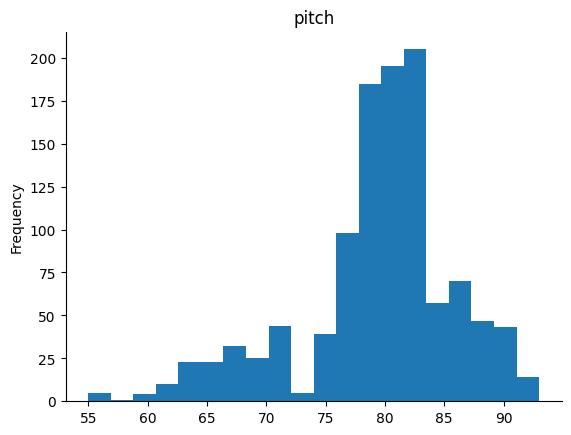

In [22]:
# @title pitch
from matplotlib import pyplot as plt
notes['pitch'].plot(kind='hist', bins=20, title='pitch')
plt.gca().spines[['top', 'right',]].set_visible(False)

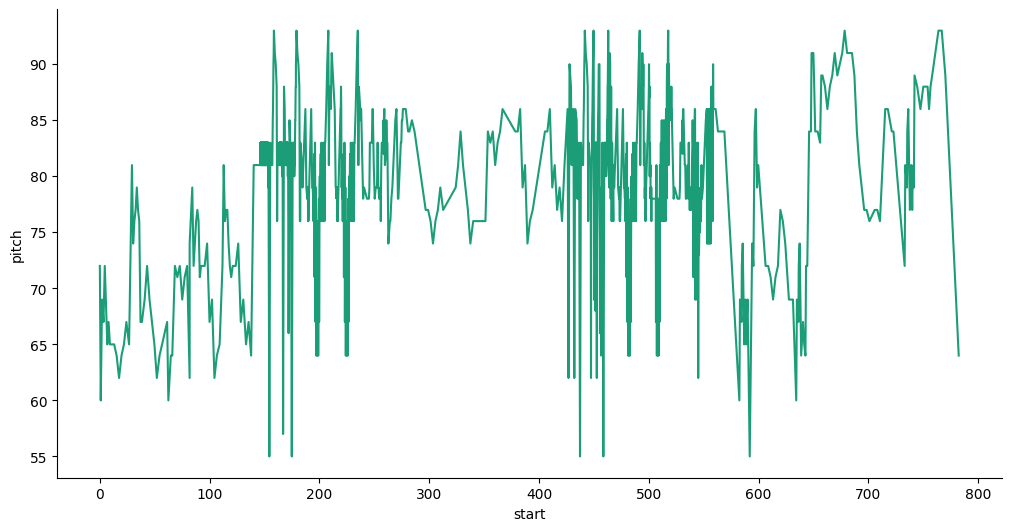

In [23]:
# @title start vs pitch

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['start']
  ys = series['pitch']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = notes.sort_values('start', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('start')
_ = plt.ylabel('pitch')

## Plot the piano

In [24]:
def plot_piano_rolls(notes: pd.DataFrame, count: Optional[int]=None):
  if count:
    title = f'First {count} Notes'
  else:
    title = f"Whole Track"
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(plot_start_stop[:, :count], plot_pitch[:, :count], color='b', marker='.')
  plt.xlabel('Time (seconds)')
  plt.ylabel('Pitch')
  plt.title(title)
  plt.show()

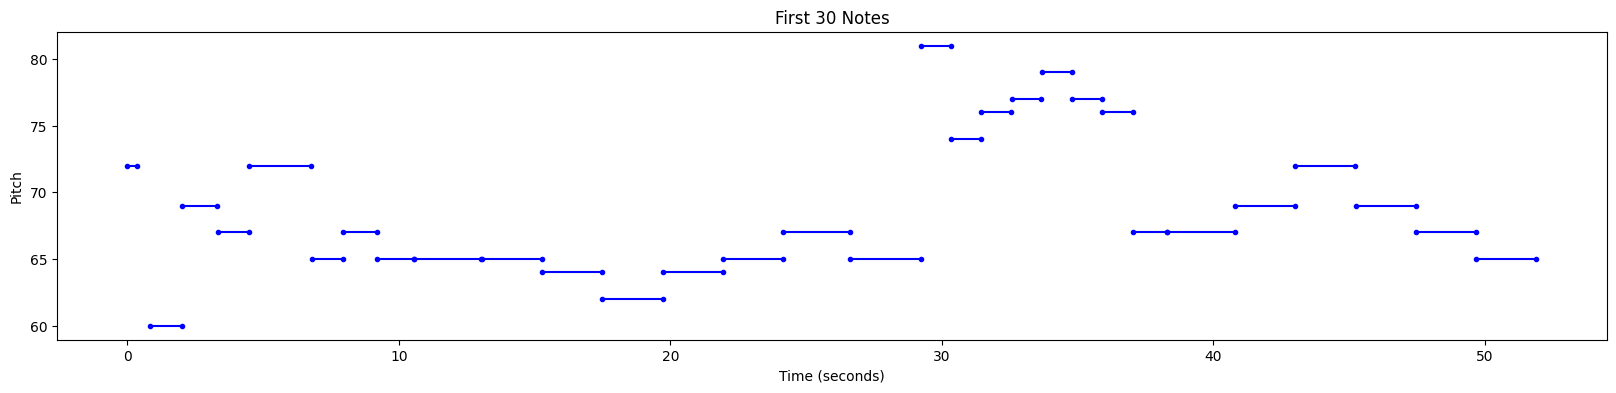

In [25]:
plot_piano_rolls(notes, count=30)

# Preprocessing

## Remove any empty rows

In [26]:
masking = data['text'].isna() | data['text'].apply(lambda x: len(x) == 0)

empty_rows = data[masking].index

if empty_rows.empty: print("No empty rows found")
else: print(f"Found {len(empty_rows)} empty rows")

No empty rows found


In [27]:
data = data[data['text'] != '']

In [28]:
data

,text
0,PIECE_START TIME_SIGNATURE=4_4 GENRE=OTHER TRA...
1,PIECE_START TIME_SIGNATURE=4_4 GENRE=OTHER TRA...
2,PIECE_START TIME_SIGNATURE=4_4 GENRE=OTHER TRA...
3,PIECE_START TIME_SIGNATURE=4_4 GENRE=OTHER TRA...
4,PIECE_START TIME_SIGNATURE=4_4 GENRE=OTHER TRA...
...,...
4450,PIECE_START TIME_SIGNATURE=2_4 GENRE=CLASSICAL...
4451,PIECE_START TIME_SIGNATURE=2_4 GENRE=CLASSICAL...
4452,PIECE_START TIME_SIGNATURE=2_4 GENRE=CLASSICAL...
4453,PIECE_START TIME_SIGNATURE=2_4 GENRE=CLASSICAL...


## Remove duplicated rows

In [29]:
duplicate_mask = data.duplicated(subset=['text'], keep='first')

duplicate_rows = data[duplicate_mask].index

if duplicate_rows.empty: print("No duplicate rows found")
else: print(f"Found {len(duplicate_rows)} duplicate rows")

Found 262 duplicate rows


In [30]:
data = data.drop_duplicates(subset=['text'], keep='first')

## Remove songs that donnot have NOTE_ON

In [31]:
mask = ~data['text'].str.contains('NOTE_ON')
no_note_on_rows = data[mask].index

if no_note_on_rows.empty: print("No rows without NOTE_ON found")
else: print(f"Found {len(no_note_on_rows)} rows without NOTE_ON")

No rows without NOTE_ON found


In [32]:
data = data[~mask]
data

,text
0,PIECE_START TIME_SIGNATURE=4_4 GENRE=OTHER TRA...
1,PIECE_START TIME_SIGNATURE=4_4 GENRE=OTHER TRA...
2,PIECE_START TIME_SIGNATURE=4_4 GENRE=OTHER TRA...
3,PIECE_START TIME_SIGNATURE=4_4 GENRE=OTHER TRA...
4,PIECE_START TIME_SIGNATURE=4_4 GENRE=OTHER TRA...
...,...
4450,PIECE_START TIME_SIGNATURE=2_4 GENRE=CLASSICAL...
4451,PIECE_START TIME_SIGNATURE=2_4 GENRE=CLASSICAL...
4452,PIECE_START TIME_SIGNATURE=2_4 GENRE=CLASSICAL...
4453,PIECE_START TIME_SIGNATURE=2_4 GENRE=CLASSICAL...


In [33]:
data['text'] = data['text'].str.replace(r'\b=4_4\b', '', case=False, regex=True)
data['text'] = data['text'].str.replace('=4_4', '', regex=False)

In [34]:
data

,text
0,PIECE_START TIME_SIGNATURE GENRE=OTHER TRACK_S...
1,PIECE_START TIME_SIGNATURE GENRE=OTHER TRACK_S...
2,PIECE_START TIME_SIGNATURE GENRE=OTHER TRACK_S...
3,PIECE_START TIME_SIGNATURE GENRE=OTHER TRACK_S...
4,PIECE_START TIME_SIGNATURE GENRE=OTHER TRACK_S...
...,...
4450,PIECE_START TIME_SIGNATURE=2_4 GENRE=CLASSICAL...
4451,PIECE_START TIME_SIGNATURE=2_4 GENRE=CLASSICAL...
4452,PIECE_START TIME_SIGNATURE=2_4 GENRE=CLASSICAL...
4453,PIECE_START TIME_SIGNATURE=2_4 GENRE=CLASSICAL...


## Remove the songs that have less number of features

In [35]:
# Create a new column 'num_words' that contains the number of words in each row of the 'text' column
data['num_words'] = data['text'].str.split().str.len()

# Calculate the highest, lowest, and average number of words
highest_num_words = data['num_words'].max()
lowest_num_words = data['num_words'].min()
average_num_words = data['num_words'].mean()

print('Highest number of words:', highest_num_words)
print('Lowest number of words:', lowest_num_words)
print('Average number of words:', average_num_words)

Highest number of words: 2552
Lowest number of words: 57
Average number of words: 489.49511089911755


In [36]:
data = data[data['num_words'] >= 300]

In [37]:
data = data.drop('num_words', axis=1)

In [38]:
data

,text
0,PIECE_START TIME_SIGNATURE GENRE=OTHER TRACK_S...
1,PIECE_START TIME_SIGNATURE GENRE=OTHER TRACK_S...
2,PIECE_START TIME_SIGNATURE GENRE=OTHER TRACK_S...
3,PIECE_START TIME_SIGNATURE GENRE=OTHER TRACK_S...
4,PIECE_START TIME_SIGNATURE GENRE=OTHER TRACK_S...
...,...
4450,PIECE_START TIME_SIGNATURE=2_4 GENRE=CLASSICAL...
4451,PIECE_START TIME_SIGNATURE=2_4 GENRE=CLASSICAL...
4452,PIECE_START TIME_SIGNATURE=2_4 GENRE=CLASSICAL...
4453,PIECE_START TIME_SIGNATURE=2_4 GENRE=CLASSICAL...


In [39]:
# def clean_generated_sequence(token_sequence):
#     token_sequence = token_sequence.split()
#     cleaned_sequence = []
#     bar_start_index = None

#     for i, token in enumerate(token_sequence):
#         if token == "BAR_START":
#             if bar_start_index is None:  # Only mark the start if not already inside a bar
#                 bar_start_index = i
#         elif token == "BAR_END":
#             if bar_start_index is not None and (i - bar_start_index) > 1:  # Ensure there's content within the bar
#                 cleaned_sequence.append("BAR_START")
#                 cleaned_sequence.extend(token_sequence[bar_start_index+1:i])
#                 cleaned_sequence.append("BAR_END")
#             bar_start_index = None  # Reset bar start index
#         elif bar_start_index is None:  # If not currently tracking a bar, just add the token
#             cleaned_sequence.append(token)

#         if bar_start_index is not None:
#           cleaned_sequence.extend(token_sequence[bar_start_index+1:])

#     return "".join(cleaned_sequence)

In [40]:
# data['text'] = data['text'].apply(clean_generated_sequence)

In [41]:
# data

# Pushing the dataset to Hugging Face Repository

In [42]:
DATASET = f'{dataset_name}-dataset'
DATASET

'english-dataset'

In [43]:
def push_to_hf(data):
  final_dataset = Dataset.from_pandas(data)
  final_dataset = final_dataset.remove_columns("__index_level_0__")
  final_dataset.push_to_hub(DATASET)
  return "Pushed to Hugging Face"

In [44]:
push_to_hf(data)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/279 [00:00<?, ?B/s]

'Pushed to Hugging Face'